In [129]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
# warnings.simplefilter('ignore')
import torch
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import classification_report
import seaborn as sns
import torch.nn as nn

from torchvision import datasets, transforms

print(torch.__version__)

2.5.1+cpu


# Здесь сначала обычный перцептрон, но с Adam

In [3]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.kaiming_normal_(m.weight)
        m.bias.data.fill_(0.01)

In [55]:


class Model_ReLu_Adam(torch.nn.Module):
    def __init__(self,input_size,hidden_1_size,hidden_2_size,output_size):
        super(Model_ReLu_Adam, self).__init__()
        self.apply(init_weights)
        self.act1 = torch.nn.ReLU()
        self.fc1 = torch.nn.Linear(input_size, hidden_1_size)
        self.bn1 = torch.nn.BatchNorm1d(hidden_1_size)
        self.fc2 = torch.nn.Linear(hidden_1_size, hidden_2_size)
        self.bn2 = torch.nn.BatchNorm1d(hidden_2_size)
        self.fc3 = torch.nn.Linear(hidden_2_size, output_size)
        self.act2 = torch.nn.Softmax(dim=1)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act1(x)
        x = self.fc3(x)
        x = self.act2(x)
        return x

    
    def batch_train(model, optimizer, x, y):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        model.zero_grad()
        loss.backward()
        optimizer.step()
        return (loss.item())
        
    def train(model, n_epochs, batch_size, learning_rate,  X, y, X_test, y_test):
        acc_train_all = []
        loss_train_all = []
        acc_test_all = []
        loss_test_all = []
        optimizerAdam = torch.optim.Adam(model.parameters(), lr=0.01)




        for epoch in range(n_epochs):

            permutation = torch.randperm(X.size()[0])

            for i in tqdm(range(0,x_train_norm.float().size()[0], batch_size)):
                indices = permutation[i:i+batch_size]
                batch_x, batch_y = X[indices], y[indices]
                model.batch_train(optimizerAdam, batch_x, batch_y)


            y_test_pred = model(X_test)
            y_train_pred = model(X)


            acc_train = accuracy_score(y, y_train_pred.argmax(dim=1))
            loss_train = loss_fn(y_train_pred, y).detach()
            acc_test = accuracy_score(y_test, y_test_pred.argmax(dim=1))
            loss_test = loss_fn(y_test_pred, y_test).detach()

            acc_train_all = np.append(acc_train_all, acc_train)
            loss_train_all = np.append(loss_train_all, loss_train)
            acc_test_all = np.append(acc_test_all, acc_test)
            loss_test_all = np.append(loss_test_all, loss_test)
            print(f'Epoch {epoch}: \n Accuracy - train: {acc_train} | test: {acc_test} \n Loss - train: {loss_train} | test: {loss_test}')

        return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)
        

In [43]:
def vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all):
    fig = plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)

    plt.plot(loss_train_all, label='loss')
    plt.plot(loss_test_all, label='val_loss')

    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(acc_train_all, label='acc')
    plt.plot(acc_test_all, label='val_acc')

    plt.legend()
    plt.show()

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X_mn, y_mn = mnist["data"], mnist["target"]

In [6]:
from skimage.feature import hog


In [67]:
X_mn_hog = []
for el in X_mn.values[:30000]:
    img = (np.array(el).reshape(28,28)).astype('uint8')
    fd,hog_img = hog(img, orientations=5, pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2), visualize=True, channel_axis=None)
    X_mn_hog.append(fd)
y_mn_hog = y_mn

In [90]:
X_mn_train, X_mn_test, y_mn_train, y_mn_test = train_test_split(X_mn_hog[:30000], y_mn_hog.values.astype('uint8')[:30000], test_size=0.2, random_state=42)

In [69]:
n_epochs = 200
batch_size = 300
learning_rate = 0.01

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()

torch.Size([24000, 720])
720


In [70]:


model_ra = Model_ReLu_Adam(D_in,200,20,D_out)
model_ra = model_ra.apply(init_weights)

In [71]:
mean = X_mn_train.mean()
std = X_mn_test.std()
x_train_norm = (X_mn_train - mean) / std
x_test_norm = (X_mn_test - mean) / std

In [72]:
acc_train_all_r3000nn, loss_train_all_r3000nn, acc_test_all_r3000nn, loss_test_all_r3000nn = model_ra.train(n_epochs, batch_size, learning_rate, x_train_norm, y_mn_train, x_test_norm, y_mn_test)

100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 396.95it/s]


Epoch 0: 
 Accuracy - train: 0.9810833333333333 | test: 0.9713333333333334 
 Loss - train: 1.4867968559265137 | test: 1.4983975887298584


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 391.11it/s]


Epoch 1: 
 Accuracy - train: 0.9887916666666666 | test: 0.973 
 Loss - train: 1.4765348434448242 | test: 1.492100477218628


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 402.52it/s]


Epoch 2: 
 Accuracy - train: 0.99075 | test: 0.9758333333333333 
 Loss - train: 1.4731731414794922 | test: 1.4886150360107422


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 435.06it/s]


Epoch 3: 
 Accuracy - train: 0.9934166666666666 | test: 0.9768333333333333 
 Loss - train: 1.4694721698760986 | test: 1.486478328704834


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 427.99it/s]


Epoch 4: 
 Accuracy - train: 0.9937083333333333 | test: 0.9763333333333334 
 Loss - train: 1.4689871072769165 | test: 1.4868611097335815


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 425.29it/s]


Epoch 5: 
 Accuracy - train: 0.996 | test: 0.9788333333333333 
 Loss - train: 1.4663020372390747 | test: 1.4843348264694214


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 387.22it/s]


Epoch 6: 
 Accuracy - train: 0.9965416666666667 | test: 0.9783333333333334 
 Loss - train: 1.4655731916427612 | test: 1.4843339920043945


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 411.74it/s]


Epoch 7: 
 Accuracy - train: 0.9972083333333334 | test: 0.9786666666666667 
 Loss - train: 1.464789867401123 | test: 1.4838818311691284


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 389.67it/s]


Epoch 8: 
 Accuracy - train: 0.9962916666666667 | test: 0.976 
 Loss - train: 1.4657847881317139 | test: 1.4855211973190308


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 404.94it/s]


Epoch 9: 
 Accuracy - train: 0.9969583333333333 | test: 0.9785 
 Loss - train: 1.4646393060684204 | test: 1.4833979606628418


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 411.54it/s]


Epoch 10: 
 Accuracy - train: 0.9973333333333333 | test: 0.9775 
 Loss - train: 1.4641607999801636 | test: 1.4835766553878784


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 412.53it/s]


Epoch 11: 
 Accuracy - train: 0.99725 | test: 0.9768333333333333 
 Loss - train: 1.4642071723937988 | test: 1.485018253326416


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 430.09it/s]


Epoch 12: 
 Accuracy - train: 0.9978333333333333 | test: 0.9786666666666667 
 Loss - train: 1.4636967182159424 | test: 1.4834293127059937


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 433.31it/s]


Epoch 13: 
 Accuracy - train: 0.997875 | test: 0.9791666666666666 
 Loss - train: 1.46358060836792 | test: 1.4829189777374268


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 397.24it/s]


Epoch 14: 
 Accuracy - train: 0.996625 | test: 0.9788333333333333 
 Loss - train: 1.465127944946289 | test: 1.484130859375


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 407.52it/s]


Epoch 15: 
 Accuracy - train: 0.9972083333333334 | test: 0.9775 
 Loss - train: 1.4643911123275757 | test: 1.484784722328186


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 411.51it/s]


Epoch 16: 
 Accuracy - train: 0.9976666666666667 | test: 0.9775 
 Loss - train: 1.4637672901153564 | test: 1.4839329719543457


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 414.18it/s]


Epoch 17: 
 Accuracy - train: 0.9975833333333334 | test: 0.9766666666666667 
 Loss - train: 1.4639312028884888 | test: 1.4846693277359009


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 386.13it/s]


Epoch 18: 
 Accuracy - train: 0.9981666666666666 | test: 0.9766666666666667 
 Loss - train: 1.463293433189392 | test: 1.4848891496658325


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 394.29it/s]


Epoch 19: 
 Accuracy - train: 0.9979583333333333 | test: 0.9785 
 Loss - train: 1.4634056091308594 | test: 1.483572244644165


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 407.04it/s]


Epoch 20: 
 Accuracy - train: 0.998125 | test: 0.9798333333333333 
 Loss - train: 1.4631716012954712 | test: 1.4821323156356812


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 435.27it/s]


Epoch 21: 
 Accuracy - train: 0.9983333333333333 | test: 0.9815 
 Loss - train: 1.4630428552627563 | test: 1.4808694124221802


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 416.11it/s]


Epoch 22: 
 Accuracy - train: 0.9985 | test: 0.9795 
 Loss - train: 1.4627245664596558 | test: 1.482431173324585


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 421.46it/s]


Epoch 23: 
 Accuracy - train: 0.9983333333333333 | test: 0.9791666666666666 
 Loss - train: 1.4629666805267334 | test: 1.4820218086242676


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 429.16it/s]


Epoch 24: 
 Accuracy - train: 0.997875 | test: 0.9766666666666667 
 Loss - train: 1.4634813070297241 | test: 1.4841601848602295


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 412.36it/s]


Epoch 25: 
 Accuracy - train: 0.9979166666666667 | test: 0.9781666666666666 
 Loss - train: 1.4634920358657837 | test: 1.4832301139831543


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 430.97it/s]


Epoch 26: 
 Accuracy - train: 0.9983333333333333 | test: 0.977 
 Loss - train: 1.46299409866333 | test: 1.4842946529388428


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 442.12it/s]


Epoch 27: 
 Accuracy - train: 0.9982083333333334 | test: 0.978 
 Loss - train: 1.4630478620529175 | test: 1.4834603071212769


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 386.82it/s]


Epoch 28: 
 Accuracy - train: 0.9981666666666666 | test: 0.978 
 Loss - train: 1.4631849527359009 | test: 1.4836314916610718


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 404.04it/s]


Epoch 29: 
 Accuracy - train: 0.9975 | test: 0.9765 
 Loss - train: 1.463969349861145 | test: 1.4847575426101685


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 432.86it/s]


Epoch 30: 
 Accuracy - train: 0.9980833333333333 | test: 0.9768333333333333 
 Loss - train: 1.4632434844970703 | test: 1.4841797351837158


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 440.71it/s]


Epoch 31: 
 Accuracy - train: 0.998125 | test: 0.9776666666666667 
 Loss - train: 1.4633431434631348 | test: 1.4838157892227173


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 401.58it/s]


Epoch 32: 
 Accuracy - train: 0.9981666666666666 | test: 0.9796666666666667 
 Loss - train: 1.4631316661834717 | test: 1.4821125268936157


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 385.39it/s]


Epoch 33: 
 Accuracy - train: 0.99775 | test: 0.9771666666666666 
 Loss - train: 1.4634729623794556 | test: 1.484294056892395


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 368.46it/s]


Epoch 34: 
 Accuracy - train: 0.9987083333333333 | test: 0.9788333333333333 
 Loss - train: 1.4625436067581177 | test: 1.4823697805404663


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 355.07it/s]


Epoch 35: 
 Accuracy - train: 0.9980833333333333 | test: 0.9798333333333333 
 Loss - train: 1.463335633277893 | test: 1.4822598695755005


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 380.50it/s]


Epoch 36: 
 Accuracy - train: 0.9979166666666667 | test: 0.9785 
 Loss - train: 1.463315486907959 | test: 1.4830138683319092


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 373.29it/s]


Epoch 37: 
 Accuracy - train: 0.9977916666666666 | test: 0.9761666666666666 
 Loss - train: 1.4635717868804932 | test: 1.4847216606140137


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 385.84it/s]


Epoch 38: 
 Accuracy - train: 0.9982916666666667 | test: 0.979 
 Loss - train: 1.463046908378601 | test: 1.4826700687408447


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 435.03it/s]


Epoch 39: 
 Accuracy - train: 0.9985 | test: 0.979 
 Loss - train: 1.4627254009246826 | test: 1.4821929931640625


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 402.43it/s]


Epoch 40: 
 Accuracy - train: 0.99875 | test: 0.9795 
 Loss - train: 1.4624732732772827 | test: 1.4823434352874756


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 397.04it/s]


Epoch 41: 
 Accuracy - train: 0.99825 | test: 0.977 
 Loss - train: 1.4629275798797607 | test: 1.4842435121536255


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 409.35it/s]


Epoch 42: 
 Accuracy - train: 0.9988333333333334 | test: 0.9801666666666666 
 Loss - train: 1.4623581171035767 | test: 1.4815468788146973


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 419.38it/s]


Epoch 43: 
 Accuracy - train: 0.9982083333333334 | test: 0.9765 
 Loss - train: 1.4630740880966187 | test: 1.4841461181640625


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 411.16it/s]


Epoch 44: 
 Accuracy - train: 0.99875 | test: 0.9768333333333333 
 Loss - train: 1.4624866247177124 | test: 1.484340786933899


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 399.77it/s]


Epoch 45: 
 Accuracy - train: 0.998625 | test: 0.9773333333333334 
 Loss - train: 1.4626432657241821 | test: 1.4834403991699219


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 397.27it/s]


Epoch 46: 
 Accuracy - train: 0.9982916666666667 | test: 0.9785 
 Loss - train: 1.4629662036895752 | test: 1.482709527015686


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 388.13it/s]


Epoch 47: 
 Accuracy - train: 0.99875 | test: 0.9801666666666666 
 Loss - train: 1.4624719619750977 | test: 1.4812572002410889


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 406.96it/s]


Epoch 48: 
 Accuracy - train: 0.9989583333333333 | test: 0.9795 
 Loss - train: 1.4623351097106934 | test: 1.4817835092544556


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 369.94it/s]


Epoch 49: 
 Accuracy - train: 0.99875 | test: 0.9793333333333333 
 Loss - train: 1.4624552726745605 | test: 1.481848120689392


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 354.09it/s]


Epoch 50: 
 Accuracy - train: 0.9987083333333333 | test: 0.9803333333333333 
 Loss - train: 1.4624954462051392 | test: 1.4813659191131592


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 371.55it/s]


Epoch 51: 
 Accuracy - train: 0.998875 | test: 0.9803333333333333 
 Loss - train: 1.4623172283172607 | test: 1.4810011386871338


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 416.56it/s]


Epoch 52: 
 Accuracy - train: 0.9988333333333334 | test: 0.98 
 Loss - train: 1.4624228477478027 | test: 1.4813779592514038


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 439.92it/s]


Epoch 53: 
 Accuracy - train: 0.9988333333333334 | test: 0.9776666666666667 
 Loss - train: 1.46235191822052 | test: 1.4832555055618286


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 437.74it/s]


Epoch 54: 
 Accuracy - train: 0.9989166666666667 | test: 0.9806666666666667 
 Loss - train: 1.4622571468353271 | test: 1.4806314706802368


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 411.59it/s]


Epoch 55: 
 Accuracy - train: 0.9985833333333334 | test: 0.9796666666666667 
 Loss - train: 1.4626411199569702 | test: 1.4814420938491821


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 427.53it/s]


Epoch 56: 
 Accuracy - train: 0.9987083333333333 | test: 0.9805 
 Loss - train: 1.4625507593154907 | test: 1.480430006980896


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 408.39it/s]


Epoch 57: 
 Accuracy - train: 0.9982916666666667 | test: 0.979 
 Loss - train: 1.4629443883895874 | test: 1.4822578430175781


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 391.11it/s]


Epoch 58: 
 Accuracy - train: 0.9985833333333334 | test: 0.978 
 Loss - train: 1.4626579284667969 | test: 1.483038306236267


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 405.36it/s]


Epoch 59: 
 Accuracy - train: 0.99825 | test: 0.9791666666666666 
 Loss - train: 1.4629606008529663 | test: 1.4826745986938477


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 413.34it/s]


Epoch 60: 
 Accuracy - train: 0.998375 | test: 0.9778333333333333 
 Loss - train: 1.4627817869186401 | test: 1.4828165769577026


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 425.84it/s]


Epoch 61: 
 Accuracy - train: 0.997625 | test: 0.9801666666666666 
 Loss - train: 1.4636659622192383 | test: 1.481682300567627


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 419.93it/s]


Epoch 62: 
 Accuracy - train: 0.998 | test: 0.9776666666666667 
 Loss - train: 1.4632515907287598 | test: 1.4837857484817505


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 392.61it/s]


Epoch 63: 
 Accuracy - train: 0.9984166666666666 | test: 0.9795 
 Loss - train: 1.462857961654663 | test: 1.4822200536727905


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 395.30it/s]


Epoch 64: 
 Accuracy - train: 0.9984166666666666 | test: 0.9796666666666667 
 Loss - train: 1.4628000259399414 | test: 1.4822967052459717


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 399.31it/s]


Epoch 65: 
 Accuracy - train: 0.998625 | test: 0.98 
 Loss - train: 1.462552547454834 | test: 1.4813048839569092


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 407.77it/s]


Epoch 66: 
 Accuracy - train: 0.9989166666666667 | test: 0.9818333333333333 
 Loss - train: 1.4622620344161987 | test: 1.4800935983657837


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 443.58it/s]


Epoch 67: 
 Accuracy - train: 0.9989583333333333 | test: 0.982 
 Loss - train: 1.4622067213058472 | test: 1.4797314405441284


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 445.97it/s]


Epoch 68: 
 Accuracy - train: 0.9982083333333334 | test: 0.9781666666666666 
 Loss - train: 1.4629408121109009 | test: 1.4829493761062622


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 429.57it/s]


Epoch 69: 
 Accuracy - train: 0.998875 | test: 0.9798333333333333 
 Loss - train: 1.462357759475708 | test: 1.4811689853668213


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 431.67it/s]


Epoch 70: 
 Accuracy - train: 0.9987083333333333 | test: 0.9811666666666666 
 Loss - train: 1.4625316858291626 | test: 1.4799407720565796


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 417.57it/s]


Epoch 71: 
 Accuracy - train: 0.9988333333333334 | test: 0.9815 
 Loss - train: 1.4623640775680542 | test: 1.4804801940917969


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 411.51it/s]


Epoch 72: 
 Accuracy - train: 0.9985416666666667 | test: 0.9773333333333334 
 Loss - train: 1.4626481533050537 | test: 1.4838968515396118


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 426.26it/s]


Epoch 73: 
 Accuracy - train: 0.9984583333333333 | test: 0.9791666666666666 
 Loss - train: 1.4626986980438232 | test: 1.4820200204849243


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 430.89it/s]


Epoch 74: 
 Accuracy - train: 0.9989166666666667 | test: 0.9796666666666667 
 Loss - train: 1.4623068571090698 | test: 1.4818639755249023


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 424.25it/s]


Epoch 75: 
 Accuracy - train: 0.998625 | test: 0.9781666666666666 
 Loss - train: 1.4626755714416504 | test: 1.4823230504989624


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 407.82it/s]


Epoch 76: 
 Accuracy - train: 0.998375 | test: 0.9783333333333334 
 Loss - train: 1.462754726409912 | test: 1.4830090999603271


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 409.61it/s]


Epoch 77: 
 Accuracy - train: 0.998125 | test: 0.9781666666666666 
 Loss - train: 1.4630615711212158 | test: 1.4825255870819092


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 417.25it/s]


Epoch 78: 
 Accuracy - train: 0.9989166666666667 | test: 0.9795 
 Loss - train: 1.4622585773468018 | test: 1.481122374534607


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 416.82it/s]


Epoch 79: 
 Accuracy - train: 0.99875 | test: 0.9766666666666667 
 Loss - train: 1.4624329805374146 | test: 1.4843376874923706


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 410.76it/s]


Epoch 80: 
 Accuracy - train: 0.998875 | test: 0.9775 
 Loss - train: 1.4622598886489868 | test: 1.4828298091888428


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 357.62it/s]


Epoch 81: 
 Accuracy - train: 0.9985833333333334 | test: 0.9781666666666666 
 Loss - train: 1.4625377655029297 | test: 1.4829078912734985


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 371.49it/s]


Epoch 82: 
 Accuracy - train: 0.9987083333333333 | test: 0.9781666666666666 
 Loss - train: 1.4624773263931274 | test: 1.4832206964492798


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 390.47it/s]


Epoch 83: 
 Accuracy - train: 0.998875 | test: 0.9803333333333333 
 Loss - train: 1.4623377323150635 | test: 1.4808694124221802


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 406.87it/s]


Epoch 84: 
 Accuracy - train: 0.9985833333333334 | test: 0.9766666666666667 
 Loss - train: 1.4627056121826172 | test: 1.483978033065796


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 407.15it/s]


Epoch 85: 
 Accuracy - train: 0.9984583333333333 | test: 0.978 
 Loss - train: 1.4627337455749512 | test: 1.483036994934082


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 410.14it/s]


Epoch 86: 
 Accuracy - train: 0.9987916666666666 | test: 0.9793333333333333 
 Loss - train: 1.4624098539352417 | test: 1.4817802906036377


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 394.97it/s]


Epoch 87: 
 Accuracy - train: 0.9984583333333333 | test: 0.9773333333333334 
 Loss - train: 1.462687373161316 | test: 1.4839473962783813


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 397.25it/s]


Epoch 88: 
 Accuracy - train: 0.9989166666666667 | test: 0.9785 
 Loss - train: 1.4622986316680908 | test: 1.4825602769851685


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 372.07it/s]


Epoch 89: 
 Accuracy - train: 0.9984583333333333 | test: 0.973 
 Loss - train: 1.4627633094787598 | test: 1.4874703884124756


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 379.57it/s]


Epoch 90: 
 Accuracy - train: 0.9984583333333333 | test: 0.9785 
 Loss - train: 1.462605595588684 | test: 1.4829167127609253


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 400.20it/s]


Epoch 91: 
 Accuracy - train: 0.99875 | test: 0.9796666666666667 
 Loss - train: 1.462391972541809 | test: 1.4813966751098633


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 403.30it/s]


Epoch 92: 
 Accuracy - train: 0.9986666666666667 | test: 0.9786666666666667 
 Loss - train: 1.4624494314193726 | test: 1.482090711593628


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 408.97it/s]


Epoch 93: 
 Accuracy - train: 0.9989583333333333 | test: 0.9796666666666667 
 Loss - train: 1.4622125625610352 | test: 1.4812297821044922


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 408.54it/s]


Epoch 94: 
 Accuracy - train: 0.99875 | test: 0.9785 
 Loss - train: 1.462449550628662 | test: 1.4830434322357178


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 390.13it/s]


Epoch 95: 
 Accuracy - train: 0.9987083333333333 | test: 0.9783333333333334 
 Loss - train: 1.4625496864318848 | test: 1.4828518629074097


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 393.04it/s]


Epoch 96: 
 Accuracy - train: 0.9979166666666667 | test: 0.9778333333333333 
 Loss - train: 1.4631949663162231 | test: 1.4831310510635376


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 391.79it/s]


Epoch 97: 
 Accuracy - train: 0.998875 | test: 0.9781666666666666 
 Loss - train: 1.4623209238052368 | test: 1.4828935861587524


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 387.65it/s]


Epoch 98: 
 Accuracy - train: 0.9987083333333333 | test: 0.9753333333333334 
 Loss - train: 1.4625566005706787 | test: 1.485512375831604


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 386.52it/s]


Epoch 99: 
 Accuracy - train: 0.9984166666666666 | test: 0.9766666666666667 
 Loss - train: 1.4628251791000366 | test: 1.4843900203704834


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 384.83it/s]


Epoch 100: 
 Accuracy - train: 0.9985833333333334 | test: 0.9761666666666666 
 Loss - train: 1.4626469612121582 | test: 1.4848003387451172


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 377.95it/s]


Epoch 101: 
 Accuracy - train: 0.998625 | test: 0.9778333333333333 
 Loss - train: 1.4624642133712769 | test: 1.4834680557250977


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 386.65it/s]


Epoch 102: 
 Accuracy - train: 0.99825 | test: 0.9768333333333333 
 Loss - train: 1.462915062904358 | test: 1.4848302602767944


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 384.38it/s]


Epoch 103: 
 Accuracy - train: 0.99875 | test: 0.9775 
 Loss - train: 1.4623924493789673 | test: 1.4835481643676758


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 365.02it/s]


Epoch 104: 
 Accuracy - train: 0.9980833333333333 | test: 0.9756666666666667 
 Loss - train: 1.4631199836730957 | test: 1.4856553077697754


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 374.98it/s]


Epoch 105: 
 Accuracy - train: 0.99875 | test: 0.976 
 Loss - train: 1.4625463485717773 | test: 1.484660267829895


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 367.03it/s]


Epoch 106: 
 Accuracy - train: 0.9990416666666667 | test: 0.9783333333333334 
 Loss - train: 1.4621671438217163 | test: 1.482612133026123


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 360.45it/s]


Epoch 107: 
 Accuracy - train: 0.9990833333333333 | test: 0.98 
 Loss - train: 1.4620693922042847 | test: 1.481407880783081


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 347.39it/s]


Epoch 108: 
 Accuracy - train: 0.9990833333333333 | test: 0.9801666666666666 
 Loss - train: 1.4620656967163086 | test: 1.4809861183166504


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 358.53it/s]


Epoch 109: 
 Accuracy - train: 0.998875 | test: 0.979 
 Loss - train: 1.4622677564620972 | test: 1.48215913772583


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 358.06it/s]


Epoch 110: 
 Accuracy - train: 0.9990416666666667 | test: 0.9786666666666667 
 Loss - train: 1.4621226787567139 | test: 1.4824072122573853


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 348.74it/s]


Epoch 111: 
 Accuracy - train: 0.9989166666666667 | test: 0.9775 
 Loss - train: 1.4622161388397217 | test: 1.483135461807251


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 351.69it/s]


Epoch 112: 
 Accuracy - train: 0.9990833333333333 | test: 0.9783333333333334 
 Loss - train: 1.4620729684829712 | test: 1.4824061393737793


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 353.56it/s]


Epoch 113: 
 Accuracy - train: 0.999 | test: 0.9788333333333333 
 Loss - train: 1.4621973037719727 | test: 1.4825502634048462


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 339.14it/s]


Epoch 114: 
 Accuracy - train: 0.9989166666666667 | test: 0.9786666666666667 
 Loss - train: 1.462251901626587 | test: 1.4824045896530151


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 326.11it/s]


Epoch 115: 
 Accuracy - train: 0.9990416666666667 | test: 0.9795 
 Loss - train: 1.4621168375015259 | test: 1.4816067218780518


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 326.27it/s]


Epoch 116: 
 Accuracy - train: 0.9989166666666667 | test: 0.9781666666666666 
 Loss - train: 1.4622044563293457 | test: 1.4824388027191162


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 321.67it/s]


Epoch 117: 
 Accuracy - train: 0.9987916666666666 | test: 0.9778333333333333 
 Loss - train: 1.462448239326477 | test: 1.4831693172454834


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 335.45it/s]


Epoch 118: 
 Accuracy - train: 0.9987916666666666 | test: 0.9763333333333334 
 Loss - train: 1.462351679801941 | test: 1.4846892356872559


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 362.51it/s]


Epoch 119: 
 Accuracy - train: 0.9978333333333333 | test: 0.978 
 Loss - train: 1.4633328914642334 | test: 1.4834092855453491


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 379.07it/s]


Epoch 120: 
 Accuracy - train: 0.9978333333333333 | test: 0.9776666666666667 
 Loss - train: 1.4633361101150513 | test: 1.483452320098877


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 375.82it/s]


Epoch 121: 
 Accuracy - train: 0.9980416666666667 | test: 0.9791666666666666 
 Loss - train: 1.463057279586792 | test: 1.4825055599212646


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 358.30it/s]


Epoch 122: 
 Accuracy - train: 0.9984583333333333 | test: 0.9771666666666666 
 Loss - train: 1.4627363681793213 | test: 1.4834362268447876


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 361.58it/s]


Epoch 123: 
 Accuracy - train: 0.9984166666666666 | test: 0.9776666666666667 
 Loss - train: 1.462780237197876 | test: 1.4837397336959839


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 372.76it/s]


Epoch 124: 
 Accuracy - train: 0.9988333333333334 | test: 0.9776666666666667 
 Loss - train: 1.4623386859893799 | test: 1.4832111597061157


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 376.75it/s]


Epoch 125: 
 Accuracy - train: 0.9989583333333333 | test: 0.9788333333333333 
 Loss - train: 1.4622232913970947 | test: 1.482548475265503


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 356.91it/s]


Epoch 126: 
 Accuracy - train: 0.9989166666666667 | test: 0.9793333333333333 
 Loss - train: 1.4622584581375122 | test: 1.4818272590637207


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 347.68it/s]


Epoch 127: 
 Accuracy - train: 0.999 | test: 0.9788333333333333 
 Loss - train: 1.4621350765228271 | test: 1.4826477766036987


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 352.10it/s]


Epoch 128: 
 Accuracy - train: 0.9990833333333333 | test: 0.978 
 Loss - train: 1.462116003036499 | test: 1.4829882383346558


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 351.90it/s]


Epoch 129: 
 Accuracy - train: 0.9990833333333333 | test: 0.9788333333333333 
 Loss - train: 1.4620544910430908 | test: 1.482603669166565


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 355.42it/s]


Epoch 130: 
 Accuracy - train: 0.9990416666666667 | test: 0.978 
 Loss - train: 1.4621491432189941 | test: 1.4830408096313477


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 350.70it/s]


Epoch 131: 
 Accuracy - train: 0.9989583333333333 | test: 0.9775 
 Loss - train: 1.4621621370315552 | test: 1.4837936162948608


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 357.22it/s]


Epoch 132: 
 Accuracy - train: 0.9989583333333333 | test: 0.9775 
 Loss - train: 1.4622236490249634 | test: 1.4837405681610107


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 330.66it/s]


Epoch 133: 
 Accuracy - train: 0.999125 | test: 0.9781666666666666 
 Loss - train: 1.4620487689971924 | test: 1.482831358909607


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 326.71it/s]


Epoch 134: 
 Accuracy - train: 0.999 | test: 0.9783333333333334 
 Loss - train: 1.4621421098709106 | test: 1.4825576543807983


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 362.16it/s]


Epoch 135: 
 Accuracy - train: 0.9989583333333333 | test: 0.9796666666666667 
 Loss - train: 1.462191104888916 | test: 1.4813530445098877


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 366.80it/s]


Epoch 136: 
 Accuracy - train: 0.99925 | test: 0.9811666666666666 
 Loss - train: 1.4619221687316895 | test: 1.4799425601959229


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 364.79it/s]


Epoch 137: 
 Accuracy - train: 0.99875 | test: 0.9783333333333334 
 Loss - train: 1.4623823165893555 | test: 1.4832472801208496


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 362.62it/s]


Epoch 138: 
 Accuracy - train: 0.9990833333333333 | test: 0.9775 
 Loss - train: 1.4620680809020996 | test: 1.4833757877349854


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 342.77it/s]


Epoch 139: 
 Accuracy - train: 0.99925 | test: 0.9793333333333333 
 Loss - train: 1.4619231224060059 | test: 1.4813482761383057


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 357.36it/s]


Epoch 140: 
 Accuracy - train: 0.999 | test: 0.9786666666666667 
 Loss - train: 1.4622000455856323 | test: 1.482323408126831


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 367.53it/s]


Epoch 141: 
 Accuracy - train: 0.999125 | test: 0.979 
 Loss - train: 1.4620494842529297 | test: 1.4820550680160522


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 364.38it/s]


Epoch 142: 
 Accuracy - train: 0.9990833333333333 | test: 0.9796666666666667 
 Loss - train: 1.462065577507019 | test: 1.4814404249191284


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 350.97it/s]


Epoch 143: 
 Accuracy - train: 0.9991666666666666 | test: 0.979 
 Loss - train: 1.4619710445404053 | test: 1.4821999073028564


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 369.86it/s]


Epoch 144: 
 Accuracy - train: 0.9985 | test: 0.9758333333333333 
 Loss - train: 1.4627143144607544 | test: 1.4848992824554443


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 368.98it/s]


Epoch 145: 
 Accuracy - train: 0.9987916666666666 | test: 0.9758333333333333 
 Loss - train: 1.4624309539794922 | test: 1.4848796129226685


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 372.26it/s]


Epoch 146: 
 Accuracy - train: 0.9989166666666667 | test: 0.9776666666666667 
 Loss - train: 1.462335228919983 | test: 1.4832470417022705


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 380.33it/s]


Epoch 147: 
 Accuracy - train: 0.9987916666666666 | test: 0.9771666666666666 
 Loss - train: 1.4623630046844482 | test: 1.4839015007019043


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 380.38it/s]


Epoch 148: 
 Accuracy - train: 0.9989583333333333 | test: 0.9776666666666667 
 Loss - train: 1.4622727632522583 | test: 1.4835411310195923


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 371.57it/s]


Epoch 149: 
 Accuracy - train: 0.9985416666666667 | test: 0.9771666666666666 
 Loss - train: 1.462651014328003 | test: 1.4840240478515625


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 386.22it/s]


Epoch 150: 
 Accuracy - train: 0.9987916666666666 | test: 0.9808333333333333 
 Loss - train: 1.4623804092407227 | test: 1.4806230068206787


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 366.57it/s]


Epoch 151: 
 Accuracy - train: 0.999125 | test: 0.9811666666666666 
 Loss - train: 1.4620898962020874 | test: 1.4799879789352417


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 371.56it/s]


Epoch 152: 
 Accuracy - train: 0.9990416666666667 | test: 0.9808333333333333 
 Loss - train: 1.4621220827102661 | test: 1.4807031154632568


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 366.03it/s]


Epoch 153: 
 Accuracy - train: 0.9989583333333333 | test: 0.981 
 Loss - train: 1.462225317955017 | test: 1.480311393737793


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 352.45it/s]


Epoch 154: 
 Accuracy - train: 0.9987083333333333 | test: 0.9785 
 Loss - train: 1.462490439414978 | test: 1.4829469919204712


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 365.26it/s]


Epoch 155: 
 Accuracy - train: 0.99875 | test: 0.9783333333333334 
 Loss - train: 1.462443232536316 | test: 1.4832701683044434


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 368.58it/s]


Epoch 156: 
 Accuracy - train: 0.999125 | test: 0.9796666666666667 
 Loss - train: 1.4620534181594849 | test: 1.4812541007995605


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 364.82it/s]


Epoch 157: 
 Accuracy - train: 0.9990416666666667 | test: 0.9796666666666667 
 Loss - train: 1.4621493816375732 | test: 1.4815800189971924


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 346.36it/s]


Epoch 158: 
 Accuracy - train: 0.999 | test: 0.979 
 Loss - train: 1.4621660709381104 | test: 1.4823704957962036


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 312.56it/s]


Epoch 159: 
 Accuracy - train: 0.9991666666666666 | test: 0.9801666666666666 
 Loss - train: 1.4619929790496826 | test: 1.4810051918029785


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 342.98it/s]


Epoch 160: 
 Accuracy - train: 0.9988333333333334 | test: 0.9775 
 Loss - train: 1.462374210357666 | test: 1.4830933809280396


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 339.04it/s]


Epoch 161: 
 Accuracy - train: 0.9992083333333334 | test: 0.978 
 Loss - train: 1.4619412422180176 | test: 1.482582688331604


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 345.60it/s]


Epoch 162: 
 Accuracy - train: 0.9991666666666666 | test: 0.9781666666666666 
 Loss - train: 1.4619866609573364 | test: 1.482887864112854


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 344.65it/s]


Epoch 163: 
 Accuracy - train: 0.9990833333333333 | test: 0.9798333333333333 
 Loss - train: 1.4620542526245117 | test: 1.4816577434539795


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 359.25it/s]


Epoch 164: 
 Accuracy - train: 0.999125 | test: 0.9798333333333333 
 Loss - train: 1.4620441198349 | test: 1.4814505577087402


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 309.88it/s]


Epoch 165: 
 Accuracy - train: 0.9989583333333333 | test: 0.98 
 Loss - train: 1.462215542793274 | test: 1.481342077255249


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 326.76it/s]


Epoch 166: 
 Accuracy - train: 0.9991666666666666 | test: 0.9796666666666667 
 Loss - train: 1.4619736671447754 | test: 1.4814449548721313


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 352.04it/s]


Epoch 167: 
 Accuracy - train: 0.9989583333333333 | test: 0.979 
 Loss - train: 1.4622949361801147 | test: 1.4824327230453491


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 364.84it/s]


Epoch 168: 
 Accuracy - train: 0.9989583333333333 | test: 0.9776666666666667 
 Loss - train: 1.4622529745101929 | test: 1.4834705591201782


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 359.78it/s]


Epoch 169: 
 Accuracy - train: 0.9991666666666666 | test: 0.9805 
 Loss - train: 1.461982250213623 | test: 1.4810322523117065


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 360.63it/s]


Epoch 170: 
 Accuracy - train: 0.9989166666666667 | test: 0.9788333333333333 
 Loss - train: 1.4623030424118042 | test: 1.4823092222213745


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 363.57it/s]


Epoch 171: 
 Accuracy - train: 0.999125 | test: 0.9783333333333334 
 Loss - train: 1.4620600938796997 | test: 1.4829596281051636


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 341.51it/s]


Epoch 172: 
 Accuracy - train: 0.9989166666666667 | test: 0.9783333333333334 
 Loss - train: 1.4622437953948975 | test: 1.4827841520309448


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 355.20it/s]


Epoch 173: 
 Accuracy - train: 0.9989583333333333 | test: 0.9773333333333334 
 Loss - train: 1.4622247219085693 | test: 1.483137845993042


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 312.80it/s]


Epoch 174: 
 Accuracy - train: 0.999125 | test: 0.9801666666666666 
 Loss - train: 1.462033748626709 | test: 1.4812077283859253


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 345.01it/s]


Epoch 175: 
 Accuracy - train: 0.9992083333333334 | test: 0.9793333333333333 
 Loss - train: 1.4619635343551636 | test: 1.4815583229064941


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 324.89it/s]


Epoch 176: 
 Accuracy - train: 0.999 | test: 0.9783333333333334 
 Loss - train: 1.4621862173080444 | test: 1.4827181100845337


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 335.81it/s]


Epoch 177: 
 Accuracy - train: 0.99925 | test: 0.9796666666666667 
 Loss - train: 1.4618995189666748 | test: 1.4810243844985962


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 329.07it/s]


Epoch 178: 
 Accuracy - train: 0.9992083333333334 | test: 0.9816666666666667 
 Loss - train: 1.4619487524032593 | test: 1.479952335357666


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 330.73it/s]


Epoch 179: 
 Accuracy - train: 0.9991666666666666 | test: 0.9798333333333333 
 Loss - train: 1.4620273113250732 | test: 1.480855941772461


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 324.26it/s]


Epoch 180: 
 Accuracy - train: 0.9986666666666667 | test: 0.9803333333333333 
 Loss - train: 1.4624519348144531 | test: 1.4811811447143555


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 327.96it/s]


Epoch 181: 
 Accuracy - train: 0.999 | test: 0.9805 
 Loss - train: 1.4621378183364868 | test: 1.4810996055603027


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 312.38it/s]


Epoch 182: 
 Accuracy - train: 0.9985833333333334 | test: 0.9806666666666667 
 Loss - train: 1.4625250101089478 | test: 1.4800732135772705


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 327.73it/s]


Epoch 183: 
 Accuracy - train: 0.9985 | test: 0.9776666666666667 
 Loss - train: 1.4626833200454712 | test: 1.483935832977295


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 342.16it/s]


Epoch 184: 
 Accuracy - train: 0.9982083333333334 | test: 0.9805 
 Loss - train: 1.462960124015808 | test: 1.4806312322616577


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 361.44it/s]


Epoch 185: 
 Accuracy - train: 0.9992083333333334 | test: 0.98 
 Loss - train: 1.4619239568710327 | test: 1.480930209159851


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 365.88it/s]


Epoch 186: 
 Accuracy - train: 0.9984583333333333 | test: 0.9805 
 Loss - train: 1.462658166885376 | test: 1.4811594486236572


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 368.16it/s]


Epoch 187: 
 Accuracy - train: 0.9987083333333333 | test: 0.9771666666666666 
 Loss - train: 1.462476372718811 | test: 1.4833922386169434


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 362.94it/s]


Epoch 188: 
 Accuracy - train: 0.9984166666666666 | test: 0.977 
 Loss - train: 1.4626821279525757 | test: 1.4842480421066284


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 311.10it/s]


Epoch 189: 
 Accuracy - train: 0.998625 | test: 0.9776666666666667 
 Loss - train: 1.462445855140686 | test: 1.4837050437927246


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 332.45it/s]


Epoch 190: 
 Accuracy - train: 0.9988333333333334 | test: 0.9795 
 Loss - train: 1.4623198509216309 | test: 1.4817167520523071


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 357.09it/s]


Epoch 191: 
 Accuracy - train: 0.999 | test: 0.9805 
 Loss - train: 1.4621708393096924 | test: 1.4810340404510498


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 337.34it/s]


Epoch 192: 
 Accuracy - train: 0.9991666666666666 | test: 0.9786666666666667 
 Loss - train: 1.4619768857955933 | test: 1.481907844543457


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 348.93it/s]


Epoch 193: 
 Accuracy - train: 0.9991666666666666 | test: 0.9793333333333333 
 Loss - train: 1.4620028734207153 | test: 1.4817054271697998


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 341.34it/s]


Epoch 194: 
 Accuracy - train: 0.9992083333333334 | test: 0.9808333333333333 
 Loss - train: 1.461972713470459 | test: 1.4804075956344604


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 348.80it/s]


Epoch 195: 
 Accuracy - train: 0.9992083333333334 | test: 0.98 
 Loss - train: 1.4619781970977783 | test: 1.4814293384552002


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 333.14it/s]


Epoch 196: 
 Accuracy - train: 0.9991666666666666 | test: 0.9795 
 Loss - train: 1.4619908332824707 | test: 1.4815304279327393


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 349.76it/s]


Epoch 197: 
 Accuracy - train: 0.999125 | test: 0.9786666666666667 
 Loss - train: 1.4620561599731445 | test: 1.482213020324707


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 341.75it/s]


Epoch 198: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.4619861841201782 | test: 1.4827086925506592


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 341.97it/s]

Epoch 199: 
 Accuracy - train: 0.9992083333333334 | test: 0.9783333333333334 
 Loss - train: 1.461927890777588 | test: 1.4824117422103882


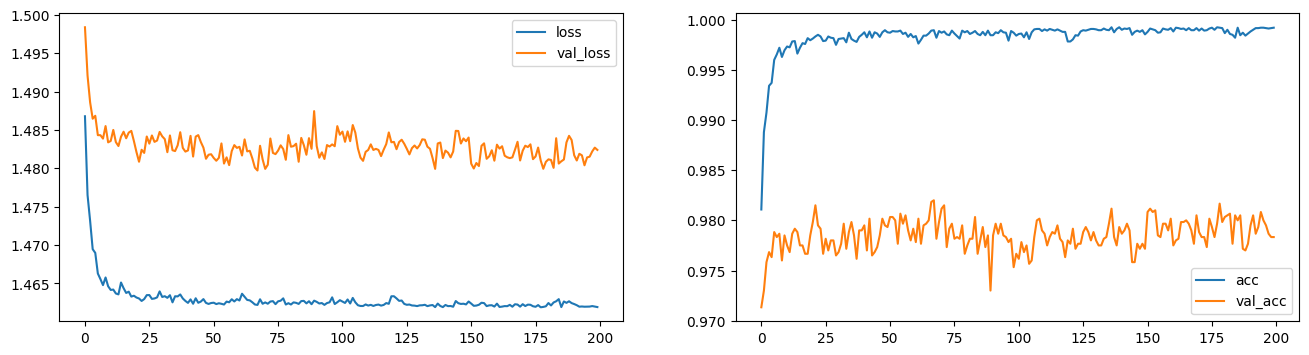

In [73]:
vis_history(acc_train_all_r3000nn, loss_train_all_r3000nn, acc_test_all_r3000nn, loss_test_all_r3000nn)

# Далее сеть с архитектурой LeNet5

In [168]:


class Model_LeNet5(torch.nn.Module):
    def __init__(self, num_classes=10,n_ch = 1,n_filt_1 = 6, n_filt_2 = 16,kernel_size_1 = 5,kernel_size_2 = 5,inp_shape = 28, hidden_size = 84):
        super(Model_LeNet5, self).__init__()

        self.conv1 = nn.Conv2d(n_ch, n_filt_1, kernel_size=kernel_size_1, stride=1, padding=0)
        n_ch = n_filt_1
        im_len = inp_shape - kernel_size_1 + 1
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2) 
        im_len = im_len / 2
        
        self.conv2 = nn.Conv2d(n_ch, n_filt_2, kernel_size=kernel_size_2, stride=1, padding=0) 
        im_len = im_len - kernel_size_2 + 1

        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2) 
        im_len = im_len / 2

        self.inp_fc_size = int(im_len * im_len) * n_filt_2
        print(im_len)
        self.fc1 = nn.Linear(self.inp_fc_size, hidden_size)  
        #self.fc2 = nn.Linear(120, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))  
        x = self.pool1(x)  
        
        x = torch.relu(self.conv2(x))  
        x = self.pool2(x)
        
        x = x.view(-1, self.inp_fc_size)  
        x = torch.relu(self.fc1(x))  
        #x = torch.relu(self.fc2(x))  
        x = self.fc3(x) 
        return x
    def batch_train(model, optimizer, x, y):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        model.zero_grad()
        loss.backward()
        optimizer.step()
        return (loss.item())
        
    def fit(model, n_epochs, learning_rate, train_loader, test_loader):
        acc_train_all = []
        loss_train_all = []
        acc_test_all = []
        loss_test_all = []
        optimizerAdam = torch.optim.Adam(model.parameters(), lr=0.01)



        for epoch in range(n_epochs):
            model.train()

            #permutation = torch.randperm(X.size()[0])
            acc_train = 0
            loss_train = 0
            acc_test = 0
            loss_test = 0
            for images, labels in train_loader:
                model.batch_train(optimizerAdam, images, labels)

            for images, labels in train_loader:
                y_train_pred = model(images)
                acc_train += accuracy_score(labels, y_train_pred.argmax(dim=1))
                loss_train += loss_fn(y_train_pred, labels).detach()
                
            for images, labels in test_loader:
                y_test_pred = model(images)
                acc_test += accuracy_score(labels, y_test_pred.argmax(dim=1))
                loss_test += loss_fn(y_test_pred, labels).detach()

            acc_train_all = np.append(acc_train_all, acc_train / len(train_loader))
            loss_train_all = np.append(loss_train_all, loss_train / len(train_loader))
            acc_test_all = np.append(acc_test_all, acc_test / len(test_loader))
            loss_test_all = np.append(loss_test_all, loss_test / len(test_loader))

            print(f'Epoch {epoch}: \n Accuracy - train: {acc_train / len(train_loader)} | test: {acc_test / len(test_loader)} \n Loss - train: {loss_train / len(train_loader)} | test: {loss_test / len(test_loader)}')

        return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)
        

# Здесь для удобства разбиения на батчи используем DataLoader

In [162]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [163]:
batch_size = 64 

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [164]:
n_epochs = 10
learning_rate = 0.001

loss_fn = torch.nn.CrossEntropyLoss()

In [170]:
model_ln5 = Model_LeNet5()
model_ln5 = model_ln5.apply(init_weights)

4.0


In [171]:
acc_train_lenet5, loss_train_all_lenet5, acc_test_all_lenet5, loss_test_all_lenet5 = model_ln5.fit(n_epochs, learning_rate, train_loader, test_loader)

Epoch 0: 
 Accuracy - train: 0.9809434968017058 | test: 0.9809912420382165 
 Loss - train: 0.06237729638814926 | test: 0.05936572328209877
Epoch 1: 
 Accuracy - train: 0.9837919776119403 | test: 0.9827826433121019 
 Loss - train: 0.0535401776432991 | test: 0.05047722905874252
Epoch 2: 
 Accuracy - train: 0.9849913379530917 | test: 0.9814888535031847 
 Loss - train: 0.04775134474039078 | test: 0.059807419776916504
Epoch 3: 
 Accuracy - train: 0.9886727078891258 | test: 0.9819864649681529 
 Loss - train: 0.03708696737885475 | test: 0.05843980237841606
Epoch 4: 
 Accuracy - train: 0.9898720682302772 | test: 0.9841759554140127 
 Loss - train: 0.033114124089479446 | test: 0.052455052733421326
Epoch 5: 
 Accuracy - train: 0.9888226279317697 | test: 0.9846735668789809 
 Loss - train: 0.03616636246442795 | test: 0.05438163876533508
Epoch 6: 
 Accuracy - train: 0.9899720149253731 | test: 0.9849721337579618 
 Loss - train: 0.03380341827869415 | test: 0.05651821568608284
Epoch 7: 
 Accuracy - tra

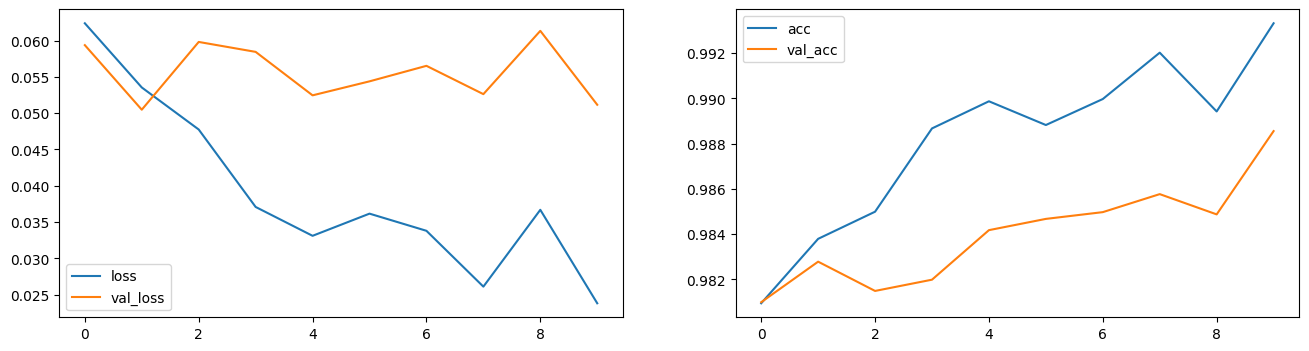

In [172]:
vis_history(acc_train_lenet5, loss_train_all_lenet5, acc_test_all_lenet5, loss_test_all_lenet5)